In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()

In [2]:
iris = pd.read_csv("../iris.csv", index_col='class')

## Data Basic Info

In [3]:
iris.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
class,,,,
Iris-setosa,5.1,3.5,1.4,0.2
Iris-setosa,4.9,3.0,1.4,0.2
Iris-setosa,4.7,3.2,1.3,0.2
Iris-setosa,4.6,3.1,1.5,0.2
Iris-setosa,5.0,3.6,1.4,0.2


In [4]:
iris.columns

Index(['sepal length in cm', 'sepal width in cm', 'petal length in cm',
       'petal width in cm'],
      dtype='object')

In [5]:
# class types
iris.index.unique()

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object', name='class')

## Data Stats

In [6]:
iris.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.groupby(['class']).mean()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [8]:
iris.groupby(['class']).median()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
class,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


In [9]:
iris.groupby(['class']).std()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
class,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


## Data Visualization

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)

In [11]:
iris_set_data = iris[iris.index == 'Iris-setosa']
iris_ver_data = iris[iris.index == 'Iris-versicolor']
iris_vir_data = iris[iris.index == 'Iris-virginica']

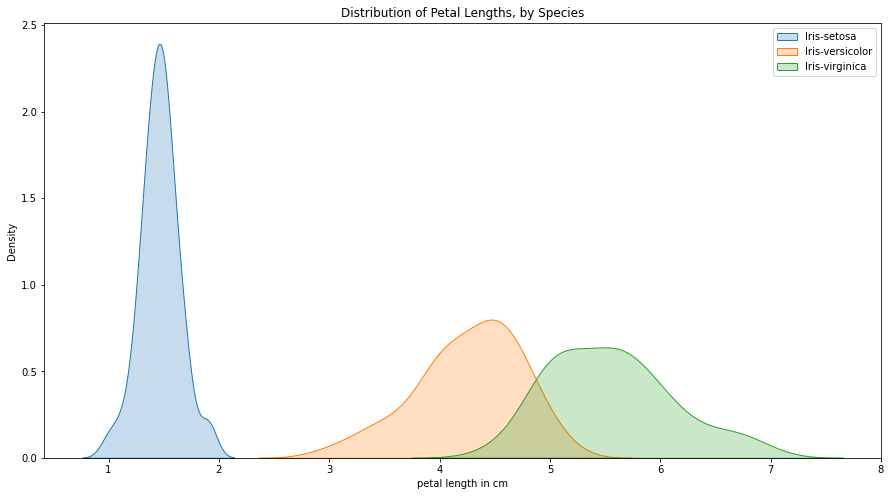

In [12]:
sns.kdeplot(data=iris_set_data['petal length in cm'], label="Iris-setosa", shade=True)
sns.kdeplot(data=iris_ver_data['petal length in cm'], label="Iris-versicolor", shade=True)
sns.kdeplot(data=iris_vir_data['petal length in cm'], label="Iris-virginica", shade=True)

plt.title("Distribution of Petal Lengths, by Species")
plt.legend()

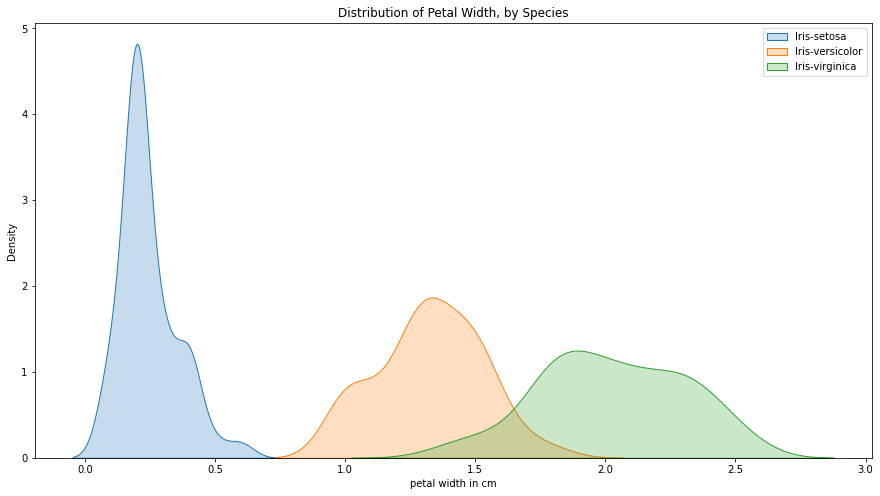

In [13]:
sns.kdeplot(data=iris_set_data['petal width in cm'], label="Iris-setosa", shade=True)
sns.kdeplot(data=iris_ver_data['petal width in cm'], label="Iris-versicolor", shade=True)
sns.kdeplot(data=iris_vir_data['petal width in cm'], label="Iris-virginica", shade=True)

plt.title("Distribution of Petal Width, by Species")
plt.legend()

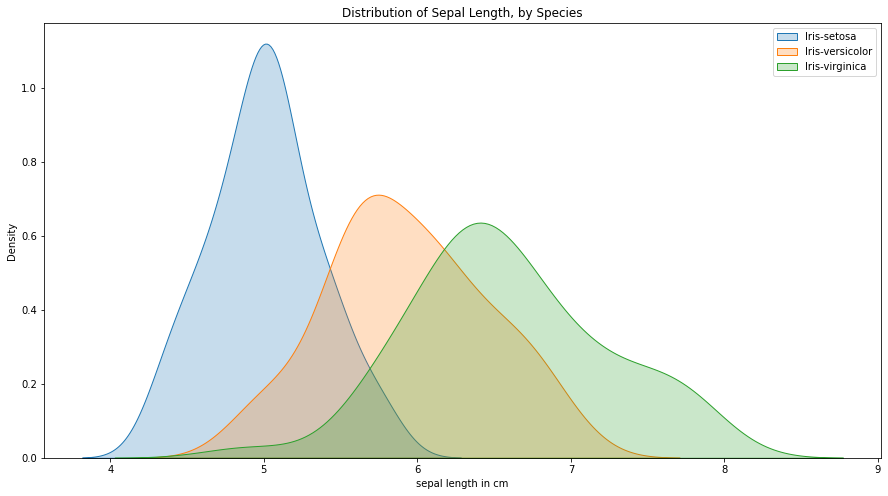

In [14]:
sns.kdeplot(data=iris_set_data['sepal length in cm'], label="Iris-setosa", shade=True)
sns.kdeplot(data=iris_ver_data['sepal length in cm'], label="Iris-versicolor", shade=True)
sns.kdeplot(data=iris_vir_data['sepal length in cm'], label="Iris-virginica", shade=True)

plt.title("Distribution of Sepal Length, by Species")
plt.legend()

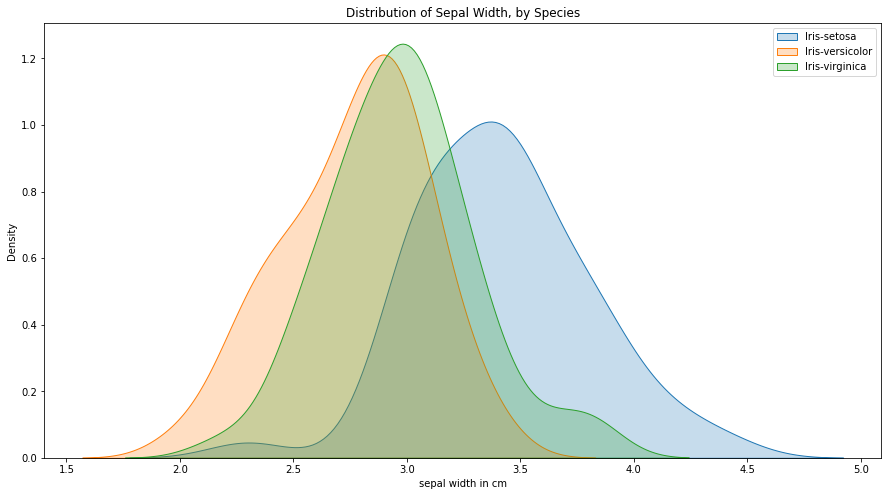

In [15]:
sns.kdeplot(data=iris_set_data['sepal width in cm'], label="Iris-setosa", shade=True)
sns.kdeplot(data=iris_ver_data['sepal width in cm'], label="Iris-versicolor", shade=True)
sns.kdeplot(data=iris_vir_data['sepal width in cm'], label="Iris-virginica", shade=True)

plt.title("Distribution of Sepal Width, by Species")
plt.legend()

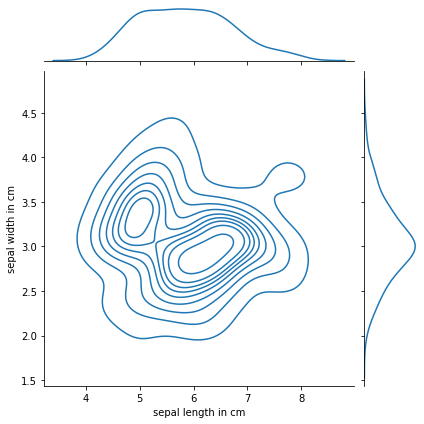

In [16]:
# 2D KDE Pliot
sns.jointplot(
    x=iris['sepal length in cm'], 
    y=iris['sepal width in cm'], 
    kind="kde"
)

## Prediction Model

### Prediction Target & Features

In [17]:
from sklearn.preprocessing import LabelEncoder

# represent class names in numerical format
LE = LabelEncoder()
iris['code'] = LE.fit_transform(iris.index)

# prediction target
y = iris['code'].values
print(y)

# features
# iris_features = ['sepal width in cm']
iris_features = ['petal width in cm']
# iris_features = ['petal length in cm']
# iris_features = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm']

X = iris.reset_index(drop=True, inplace=False)[iris_features]
X.head()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,petal width in cm
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2


In [18]:
iris.groupby(['code']).describe()

sepal length in cm                                              \
                  count   mean       std  min    25%  50%  75%  max   
code                                                                  
0                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
1                  50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
2                  50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

     sepal width in cm         ... petal length in cm      petal width in cm  \
                 count   mean  ...                75%  max             count   
code                           ...                                             
0                 50.0  3.418  ...              1.575  1.9              50.0   
1                 50.0  2.770  ...              4.600  5.1              50.0   
2                 50.0  2.974  ...              5.875  6.9              50.0   

                                                
       mean       std  min  25%  50%  75%  max  
code                                            
0     0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
1     1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
2     2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

### Split Train and Validation Sets

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### Model

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

def decision_tree(train_X, train_y):
    # Define model. Specify a number for random_state to ensure same results each run
    # iris_model = DecisionTreeRegressor(random_state=1)
    iris_model = DecisionTreeRegressor()
    iris_model.fit(train_X, train_y)
    return iris_model
    
def support_vector_machine(train_X, train_y):
    iris_model = svm.SVC()
    iris_model.fit(train_X, train_y)
    return iris_model

def random_forest(train_X, train_y):
    iris_model = RandomForestClassifier(n_estimators=1000)
    iris_model.fit(train_X, train_y)
    return iris_model

In [21]:
models = [
            ["decision_tree", decision_tree(train_X, train_y)],
            ["support_vector_machine", support_vector_machine(train_X, train_y)],
            ["random_forest", random_forest(train_X, train_y)]
         ]

### Predict val_X with train_X

In [22]:
from sklearn.metrics import mean_absolute_error

for model in models:
    model_name, iris_model = model
        
    val_predicitons_arr = iris_model.predict(val_X)
    val_predicitons_arr_int = val_predicitons_arr.astype(int)
    
    print(model_name.upper())
    print("------------------------------------------------------")
    
    print(f'Mean Absolute Error: {mean_absolute_error(val_y, val_predicitons_arr_int)}')
    print()

DECISION_TREE
------------------------------------------------------
Mean Absolute Error: 0.13157894736842105

SUPPORT_VECTOR_MACHINE
------------------------------------------------------
Mean Absolute Error: 0.02631578947368421

RANDOM_FOREST
------------------------------------------------------
Mean Absolute Error: 0.02631578947368421



### Test with the entire dataset

In [23]:
# test with entire dataset
for model in models:
    model_name, iris_model = model
        
    val_predictions_complete_arr = iris_model.predict(X)
    val_predicitons_complete_arr_int = val_predictions_complete_arr.astype(int)
    
    print(model_name.upper())
    print()
    
    print(y)
    print(val_predicitons_complete_arr_int)
    
    corect_result_arr = (val_predicitons_complete_arr_int == y).tolist().count(True)
    accuracy_percentage = (corect_result_arr / val_predictions_complete_arr.size) * 100
    print(f'\nPrediction Accuracy: {round(accuracy_percentage, 2)}%')

    print("\n======================================================\n")

DECISION_TREE

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 2 1 1 1 2 2
 2 2 2 2 2 1 2 2 1 2 2 2 1 2 1 1 1 2 1 2 2 2 1 1 2 2 1 1 2 2 2 2 2 2 2 2 2
 2 1]

Prediction Accuracy: 89.33%


SUPPORT_VECTOR_MACHINE

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0

# TODO

- Are we overfitting the data?
  - Use regularisation to prevent overfitting
- How do we know how accurate our model is?